<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>
    
</CENTER>
<font size="5"></br> Copernicus Master on Digital Earth</font></br></div>
</CENTER>
<CENTER>
<font size="3"></br>September 23rd 2020</font></br></div>
</CENTER>
<CENTER>
<span style="color:blue">lucas.drumetz@imt-atlantique.fr</span>
</CENTER>

</div>

# Lab Session: Introduction to spectral unmixing

The goal of this lab is to get familiar with the unmixing of hyperspectral images and the techniques to solve this problem. We will implement a simple unmixing chain on an ideal simulated case first, and then on a real hyperspectral image.

# Part I: Simulated data

In this section, we will generate some simulated hyperspectral data by drawing abundances from a uniform distribution on the simplex, then implement an endmember extraction algorithm, and finally estimate abundances.

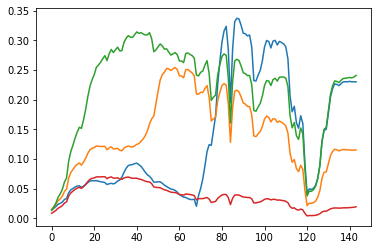

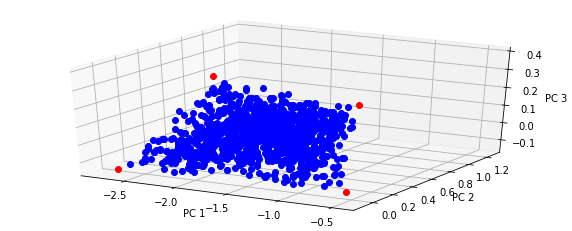

In [2]:
import numpy as np
import scipy.stats
import scipy.io as sio
import matplotlib.pyplot as plt

from pca_viz import pca_viz

## this code snippet generates 1000 points following a uniform distribution on the unit simplex with 3 vertices

alpha = [1,1,1,1]
A_synth_true = scipy.stats.dirichlet.rvs(alpha, size=1000).T

# this part loads some pure spectra taken from real data (vegetation/metallic sheets/asphalt/concrete)

endmembers = sio.loadmat("endmembers_houston.mat")
L = np.shape(endmembers['S0'])[0]
wavelengths = np.linspace(380,1050,L) #
S = endmembers['S0'][:,0:4]

plt.figure()
plt.rcParams["figure.figsize"] = (10,4)
plt.plot(wavelengths, S)

synth_data = np.dot(S,A_synth_true) # X = SA

plt.rcParams["figure.figsize"] = (10,4)
pca_viz(synth_data,S) # this function is used to represent the data in a 3D space 
#(even though they actually live in an L-dimensional space)



How many spectral bands are there? Can you recognize some of the materials by their spectra? Implement the Successive Projection Algorithm (SPA) as seen during the lecture. Apply it on the synthetic dataset. Check the quality of the extracted endmembers. Are they exactly the same as the original endmembers? Why? Try with 4 endmembers.

In [ ]:
# useful functions : np.linalg.norm, np.dot, np.outer, np.argmax, np.apply_along_axis

P = 4 # number of endmembers

def SPA(data,P):
    data_to_project = data # initialize projected data
    endmember_coordinates = [] # initialize list of endmember indices
    # TO DO
    # .....
    return(endmembers,endmember_coordinates)
        
endmembers_synth,endmember_coordinates_synth = SPA(synth_data,P)

print(endmember_coordinates_synth)

# visualize the results

# %matplotlib notebook 
pca_viz(synth_data,endmembers_synth)

plt.figure()
plt.rcParams["figure.figsize"] = (5,4)
plt.plot(endmembers_synth)

In [ ]:
# compute the abundances using the FCLSU algorithm (constrained least squares) and compare with the real values.

from FCLSU import FCLSU

A_synth = FCLSU(synth_data,endmembers_synth)



Compare for a few pixels the estimated abundances with the true ones. Are they easily comparable? Why? How can we fix this?

# Part II: Real Data

In this part, we are going to unmix a real image acquired by the airborne sensor AVIRIS over Calaveras Reservoir, California, USA. Don't hesitate to use Google maps to access a higher spatial resolution image over this scene:

https://www.google.fr/maps/place/Calaveras+Reservoir/@37.4777265,-121.8213273,4840m/data=!3m2!1e3!4b1!4m5!3m4!1s0x808fd026ab19d673:0x21f48327a3b3c623!8m2!3d37.4734195!4d-121.8192506

(199, 199, 192)
1.0
0.0


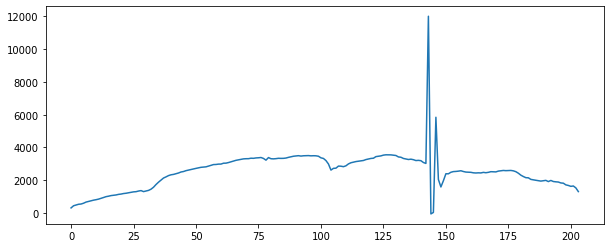

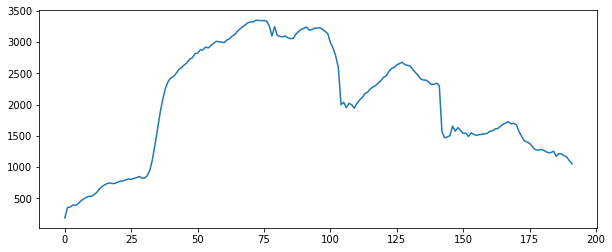

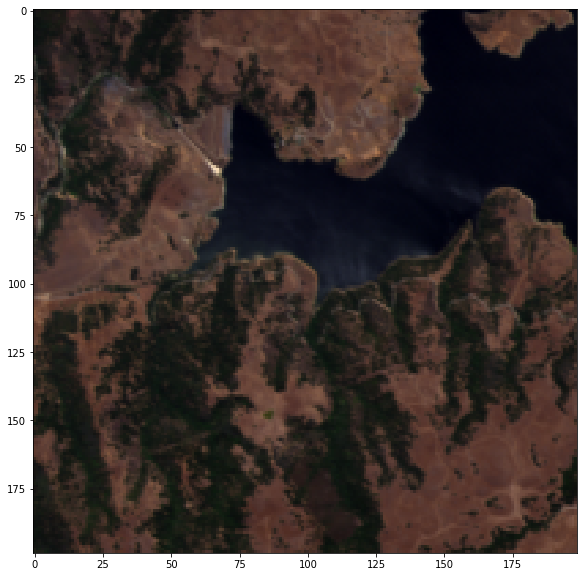

In [3]:
data = sio.loadmat("moffett1.mat")
im = data['im'].astype("double")
imrgb = data['imrgb']

plt.figure()
plt.plot(im[50,50,:]) # plot one pixel

im = np.delete(im,slice(200,224),axis =2) # delete noisy or corrupted bands
im = np.delete(im,slice(142,150),axis =2)
plt.figure()
plt.plot(im[35,24,:]) # plot one pixel after this

im = im[1:200,1:200,:] # select crop on which we will work

im = (im - np.amin(im))/(np.amax(im)-np.amin(im)) # rescale image

print(im.shape)
print(np.amax(im))
print(np.amin(im))


plt.figure(figsize=(20,10))
plt.imshow(imrgb[1:200,1:200,:])

[m,n,L] = im.shape
rgb_small =imrgb[1:200,1:200,:]


First, reshape the hyperspectral image as a $L\times N$ matrix, using the reshape function from numpy

In [ ]:
# TO DO

Use the SPA algorithm that you coded above to extract endmembers from the data. Use 4 endmembers at first. Represents the extracted pixels on the rgb image and try to visually identify them (you can use google maps as well). The "pca_viz" function provided represents the dataset and the extracted endmembers on a 3D space in the "best" way possible. 

In [ ]:
# TO DO


In [ ]:
from pca_viz import pca_viz
# %matplotlib notebook

from mpl_toolkits.mplot3d import axes3d  

# pca_viz(data,endmembers) ## represents the dataset and extracted endmembers in a 3 dimensional space

Try different values for P until you are satified with the results. Then compute the abundances using the same function as before, and display them as images, together with the corresponding endmembers. Compare the results with the RGB image, and with the high res image from Google Maps

In [ ]:
# Compute the abundances

In [ ]:
# Display the results (endmember spectra and corresponding abundance maps)


Perform the same unmixing procedure using more endmembers. Are all the endmembers relevant? 

To finish, we are going to use a variant of the abundance estimation algorithm which adds a sparsity-promoting regularization. Run it on the different configurations you identified before and compare the abundance maps.

In [ ]:
from social_unmixing import social_unmixing

# parameters

groups = np.arange(0,P)
rho = 10
maxiter_ADMM = 200
algo = "fractional"
fraction = 0.5
tol_a = 10**(-5)
verbose = True

# regularization parameter
Lambda = 0.5 # this values controls the sparsity level. The larger the value, the sparser the solution.

A_sparse = social_unmixing(im_r,ems,groups,A,Lambda,rho,maxiter_ADMM,algo, \
                    fraction,tol_a, verbose)


Finally, if you have time, try to unmix other areas of the whole image by changing the coordinates of the image in the first cell.